In [1]:
import numpy as np #Importujemy potzrebne biblioteki
import random
import time
import pygad
import math
import statistics

In [2]:
#zapisujemy wszytskie łamigłówki duże
siec_big_1 = np.array([[0,0,0,0,4,0,0,5,0,0],
                      [4,0,6,0,0,0,0,0,0,7],
                      [0,0,0,6,0,0,0,0,5,0],
                      [0,0,0,0,3,0,4,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0],
                      [0,0,0,10,0,7,0,0,0,0],
                      [0,7,0,0,0,0,4,0,0,0],
                      [4,0,0,0,0,0,0,2,0,4],
                      [0,0,5,0,0,3,0,0,0,0]])

siec_big_2 = np.array([[6,0,0,0,6,0,0,0,0,4],
                      [0,0,0,0,0,6,0,0,0,0],
                      [0,0,3,0,0,0,0,5,0,0],
                      [0,0,0,7,0,0,9,0,0,0],
                      [0,5,0,0,3,0,0,0,0,5],
                      [5,0,0,0,0,5,0,0,2,0],
                      [0,0,0,2,0,0,4,0,0,0],
                      [0,0,7,0,0,0,0,4,0,0],
                      [0,0,0,0,2,0,0,0,0,0],
                      [5,0,0,0,0,6,0,0,0,6]])

siec_big_3 = np.array([[6,0,0,0,7,0,5,0,0,0,5,0,0],
                      [0,0,0,4,0,0,0,0,0,0,0,8,8],
                      [6,0,0,0,0,4,0,0,8,0,0,0,0],
                      [0,4,0,0,0,0,0,0,5,0,0,0,0],
                      [0,0,0,0,4,0,0,5,0,0,0,0,0],
                      [0,0,4,0,0,2,0,0,0,9,0,6,0],
                      [6,0,0,0,0,0,0,0,0,0,0,0,5],
                      [0,5,0,2,0,0,0,9,0,0,7,0,0],
                      [0,0,0,0,0,6,0,0,7,0,0,0,0],
                      [0,0,0,0,6,0,0,0,0,0,0,7,0],
                      [0,0,0,0,3,0,0,7,0,0,0,0,5],
                      [3,3,0,0,0,0,0,0,0,7,0,0,0],
                      [0,0,6,0,0,0,6,0,4,0,0,0,5]])
 
siec_big_4 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,3,0,0,0,0,0,0,0,0,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,4,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,4,0,0,0,0,0,0,0,0],
                      [0,0,0,0,2,0,0,2,0,0,0,0,0,0],
                      [0,0,0,0,0,0,4,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,3,0,3,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,3,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,2,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [3]:
# Define gene space: 0 or 1, where 1 represents a filled square
gene_space = [0, 1]

def array_to_matrix(arr):
    n = int(math.sqrt(len(arr)))
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = arr[i*n+j]
    return matrix

def count_orthogonal(matrix, i, j):
    count = 0
    # Check left
    for col in range(j-1, -1, -1):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check right
    for col in range(j+1, len(matrix[0])):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check up
    for row in range(i-1, -1, -1):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    # Check down
    for row in range(i+1, len(matrix)):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    return count + 1 

def check_neighbors(matrix, i, j):
    # Check the neighbors of the given index (i, j)
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] != 1:
            return False
    return True

def check_ones(matrix, i, j):
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] == 1:
            return True
    return False

def find_adjacent(matrix, index):
    row, col = index
    adjacent = []
    if row > 0 and matrix[row-1][col] == 1:
        adjacent.append((row-1, col))
    if row < len(matrix)-1 and matrix[row+1][col] == 1:
        adjacent.append((row+1, col))
    if col > 0 and matrix[row][col-1] == 1:
        adjacent.append((row, col-1))
    if col < len(matrix[0])-1 and matrix[row][col+1] == 1:
        adjacent.append((row, col+1))
    return adjacent

def find_figures(matrix):
    figures = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 1:
                figure = []
                explore(i, j, matrix, figure)
                figures.append(figure)
    return figures

def explore(i, j, matrix, figure):
    if i < 0 or j < 0 or i >= len(matrix) or j >= len(matrix[0]) or matrix[i][j] == 0:
        return
    figure.append((i, j))
    matrix[i][j] = 0
    explore(i+1, j, matrix, figure)
    explore(i-1, j, matrix, figure)
    explore(i, j+1, matrix, figure)
    explore(i, j-1, matrix, figure)

def find_empty_figures(matrix):
    figures = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 0:
                figure = []
                explore_empty(i, j, matrix, figure)
                figures.append(figure)
    return figures

def explore_empty(i, j, matrix, figure):
    if i < 0 or j < 0 or i >= len(matrix) or j >= len(matrix[0]) or matrix[i][j] == 1:
        return
    figure.append((i, j))
    matrix[i][j] = 1
    explore_empty(i+1, j, matrix, figure)
    explore_empty(i-1, j, matrix, figure)
    explore_empty(i, j+1, matrix, figure)
    explore_empty(i, j-1, matrix, figure)


In [4]:
def fitness_func(solution, solution_idx): #tworzymy funckje fitness
    solArr = array_to_matrix(solution)
    spr = 0 
    for x in range(len(siec_big)):
        for y in range(len(siec_big)):
            if (solArr[x][y] == 0):
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                    if check_neighbors(solArr, x, y):
                        spr+=1
            else:
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                      if not check_ones(solArr, x, y):
                            spr+=1
            if siec_big[x][y] != 0:
                if (solArr[x][y] == 0):
                    spr+=1
                a = siec_big[x][y]
                b = count_orthogonal(solArr, x, y)
                spr += abs(a-b)
    new_array = [array for array in find_empty_figures(solArr) if all(index not in (0, len(solArr)) for tuple in array for index in tuple)]
    spr += len(new_array)
    spr += len(find_figures(solArr)) -1

    fitness = -spr
    return fitness

Wynik dla pierwszej dużej macierzy:

Parameters of the best solution :
[[1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]]
Fitness value of the best solution = -6


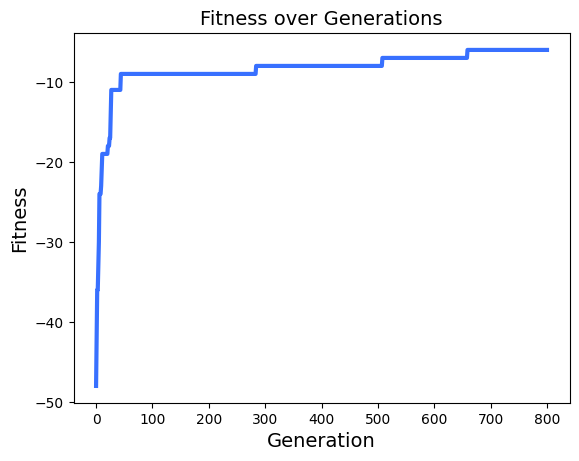

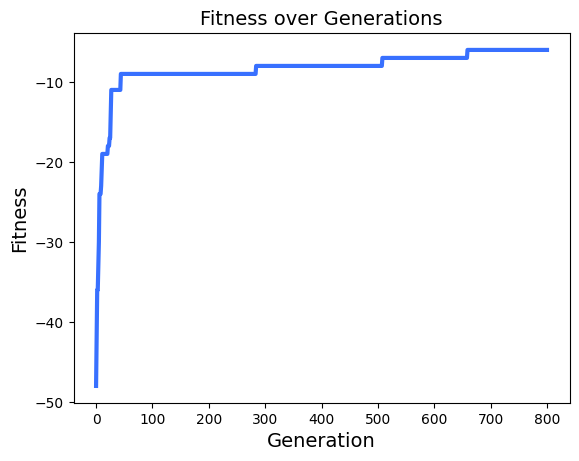

In [5]:
siec_big = np.array([[0,0,0,0,4,0,0,5,0,0],
                      [4,0,6,0,0,0,0,0,0,7],
                      [0,0,0,6,0,0,0,0,5,0],
                      [0,0,0,0,3,0,4,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0],
                      [0,0,0,10,0,7,0,0,0,0],
                      [0,7,0,0,0,0,4,0,0,0],
                      [4,0,0,0,0,0,0,2,0,4],
                      [0,0,5,0,0,3,0,0,0,0]])

# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 400  #ile chromsomów w populacji
num_genes = siec_big.size
sol_per_pop = 400
num_parents_mating = 250  #ile rodzicow do "rozmanazania" (okolo 50% populacji)
num_generations = 800  #ile pokolen
keep_parents = 12 #ilu rodzicow zachowac (kilka procent)
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 2 #mutacja ma dzialac na ilu procent genow?
stop_criteria = "reach_0"

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")


Wynik dla drugiej macierzy

Parameters of the best solution :
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]]
Fitness value of the best solution = -5


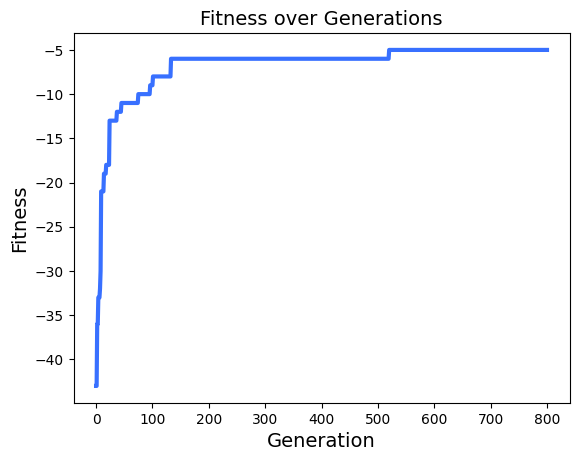

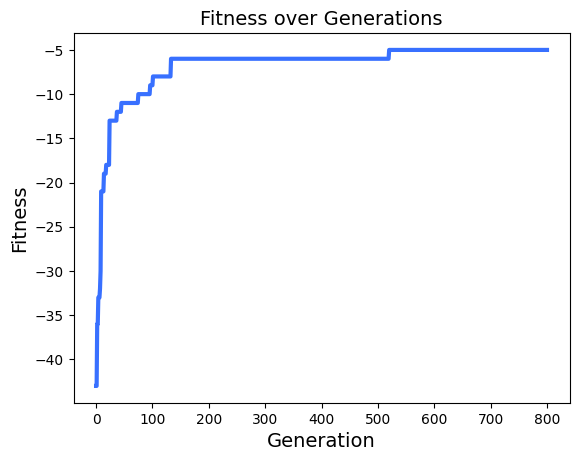

In [11]:
siec_big = np.array([[6,0,0,0,6,0,0,0,0,4],
                      [0,0,0,0,0,6,0,0,0,0],
                      [0,0,3,0,0,0,0,5,0,0],
                      [0,0,0,7,0,0,9,0,0,0],
                      [0,5,0,0,3,0,0,0,0,5],
                      [5,0,0,0,0,5,0,0,2,0],
                      [0,0,0,2,0,0,4,0,0,0],
                      [0,0,7,0,0,0,0,4,0,0],
                      [0,0,0,0,2,0,0,0,0,0],
                      [5,0,0,0,0,6,0,0,0,6]])


# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 400  #ile chromsomów w populacji
num_genes = siec_big.size
sol_per_pop = 400
num_parents_mating = 250  #ile rodzicow do "rozmanazania" (okolo 50% populacji)
num_generations = 800  #ile pokolen
keep_parents = 12 #ilu rodzicow zachowac (kilka procent)
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 2 #mutacja ma dzialac na ilu procent genow?
stop_criteria = "reach_0"

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")
 


Wynik dla trzeciej macierzy

Parameters of the best solution :
[[1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.]]
Fitness value of the best solution = -26


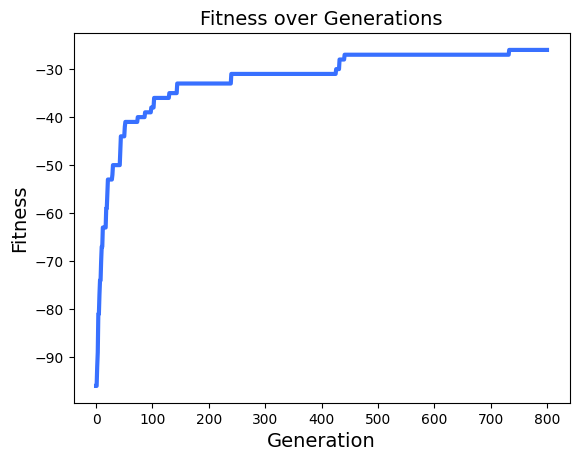

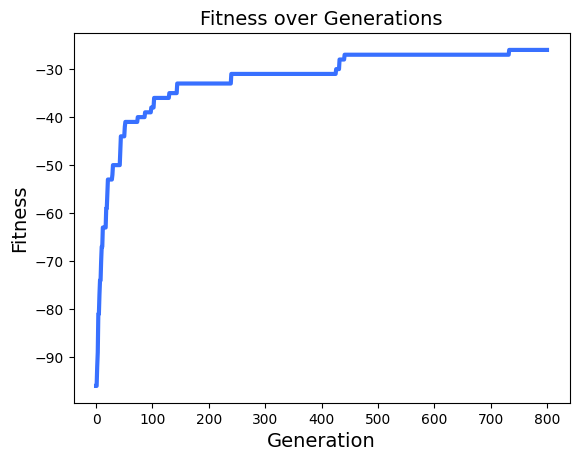

In [12]:
siec_big = np.array([[6,0,0,0,7,0,5,0,0,0,5,0,0],
                      [0,0,0,4,0,0,0,0,0,0,0,8,8],
                      [6,0,0,0,0,4,0,0,8,0,0,0,0],
                      [0,4,0,0,0,0,0,0,5,0,0,0,0],
                      [0,0,0,0,4,0,0,5,0,0,0,0,0],
                      [0,0,4,0,0,2,0,0,0,9,0,6,0],
                      [6,0,0,0,0,0,0,0,0,0,0,0,5],
                      [0,5,0,2,0,0,0,9,0,0,7,0,0],
                      [0,0,0,0,0,6,0,0,7,0,0,0,0],
                      [0,0,0,0,6,0,0,0,0,0,0,7,0],
                      [0,0,0,0,3,0,0,7,0,0,0,0,5],
                      [3,3,0,0,0,0,0,0,0,7,0,0,0],
                      [0,0,6,0,0,0,6,0,4,0,0,0,5]])

# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 400  #ile chromsomów w populacji
num_genes = siec_big.size
sol_per_pop = 400
num_parents_mating = 250  #ile rodzicow do "rozmanazania" (okolo 50% populacji)
num_generations = 800  #ile pokolen
keep_parents = 12 #ilu rodzicow zachowac (kilka procent)
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 2 #mutacja ma dzialac na ilu procent genow?
stop_criteria = "reach_0"

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")


Wynik dla czwartej macierzy

Parameters of the best solution :
[[0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Fitness value of the best solution = 0


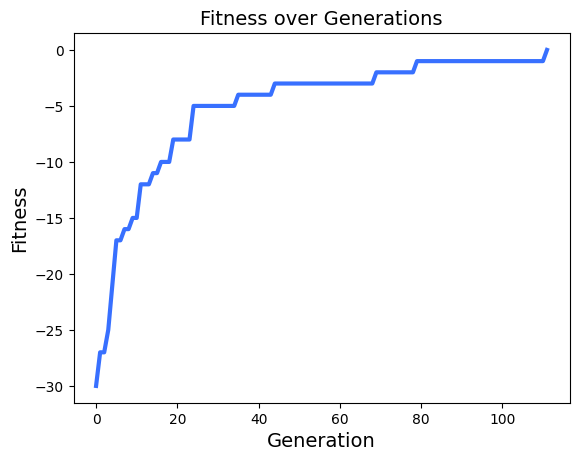

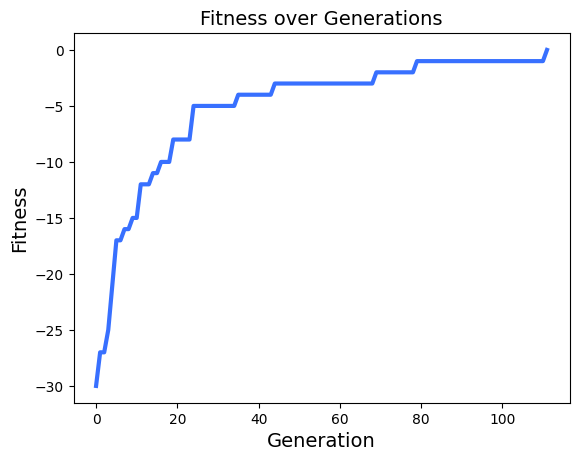

In [13]:
siec_big = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,3,0,0,0,0,0,0,0,0,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,4,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,4,0,0,0,0,0,0,0,0],
                      [0,0,0,0,2,0,0,2,0,0,0,0,0,0],
                      [0,0,0,0,0,0,4,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,3,0,3,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,3,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,2,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 400  #ile chromsomów w populacji
num_genes = siec_big.size
sol_per_pop = 400
num_parents_mating = 250  #ile rodzicow do "rozmanazania" (okolo 50% populacji)
num_generations = 800  #ile pokolen
keep_parents = 12 #ilu rodzicow zachowac (kilka procent)
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 2 #mutacja ma dzialac na ilu procent genow?
stop_criteria = "reach_0"

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")


# Efektywność

In [7]:
big = [siec_big_1, siec_big_2, siec_big_3, siec_big_4]
czas_big = []
sto = 100
for i in range(sto):
    siec_big = random.choice(big)
    num_genes = siec_big.size 
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 0:
        czas_big.append(end-start)

In [8]:
print('Średni czas pracy algorytmu:',statistics.mean(czas_big))
print('Ilość poprawnych rozwiązań: [%]', len(czas_big))

Średni czas pracy algorytmu: 74.20233619213104
Ilość poprawnych rozwiązań: [%] 20.0
